# One set of Fluxonium with a Tmon qubit

# Ec for the FX is 1.00GHz.
# And LP's are 200nm.

## Design&LOM

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.tmon import Tmon

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping


import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis

In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'  # our substrate is Silicon
# cpw_width and cpw_gap is defined from the beginnning if you need you can 
# change it later. But with this way one can be sure all the lines are having same width and gap.
design.variables['cpw_width'] = '15 um'  
design.variables['cpw_gap'] = '8.733 um'  
design._chips['main']['size']['size_x'] = '9mm'  # Our device size is 9*9mm
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True


eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d

# run the GUI 
gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.tmon import Tmon

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =270, pos_x = '-2.2mm', pos_y = '-0.8mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))


# Q2 details
options = dict(chip='main', 
            orientation =90, pos_x = '-2.40mm', pos_y = '-0.2mm',
               pad_head_width='15um', jj_gap ='40um', 
        pad_head_length='400um',
        pad_arm_width='15um',
        pad_arm_lenght='300um',
        palm_radius='15um',
        pad_gap='110um',
              gds_cell_name=gds_cell_name_jj,
                             
    flux_bias_line_options=Dict(make_fbl = True, fbl_sep='70um', 
                            fbl_width = '100um',
            ), 
     )
               
q2 = Tmon(design,'Q2', options = dict(
             **options))

# Q3 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.2mm', pos_y = '0.8mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))


gui.rebuild()

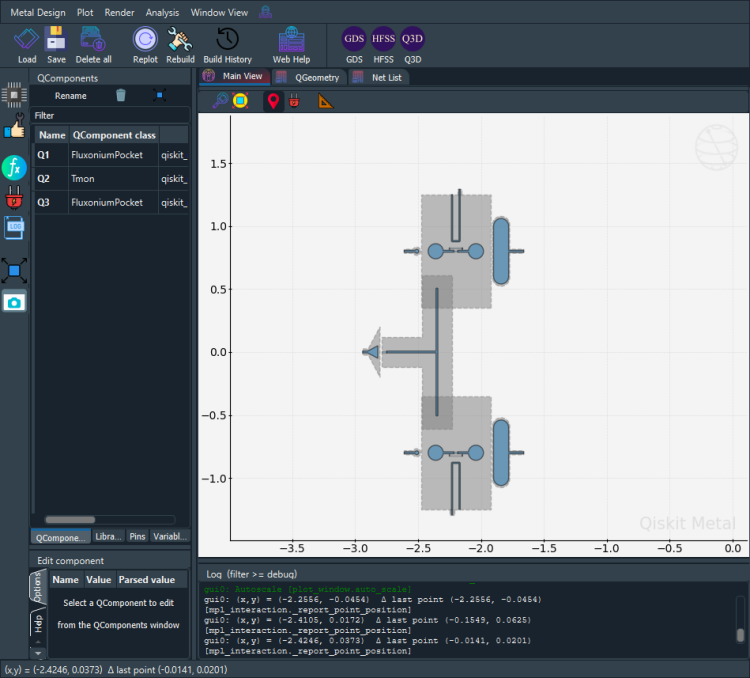

In [4]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [12]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-2.2mm',                     
  'pos_y'             : '-0.8mm',                     
  'orientation'       : 270,                          
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'pad_width'         : '15um',                       
  'pad_height'        : '100um',                      
  'pad_radius'        : '60um',                       
  'l_width'           : '1um',                        
  'l_length'          : '100um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '25um',                       
  'L_j'               : '34.38nH',                    
  'pocket_width'      : '900um',                      
  'pocket_hei

# The Maxwell Capacitance Matirx for 2FX and 1Tmon

In [4]:
#from qiskit_metal.analyses.quantization.lumped_oscillator_model_FX import LOManalysis_FX
from qiskit_metal.analyses.quantization import LOManalysis

c1 = LOManalysis(design, "q3d")

In [5]:
c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [6]:
# for second method. dont run this
# example: update single setting
c1.sim.setup.max_passes = 15
# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

## Let's calculate the total capacitance and the charging energy for Tmon. Because for FX, these are already known. 

In [7]:
c1.sim.run(components=[('Q2')], open_terminations=[('Q2', 'flux_bias_line')])
c1.sim.capacitance_matrix

INFO 01:51PM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:51PM [load_ansys_project]: 	Opened Ansys App
INFO 01:51PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 01:51PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project47
INFO 01:51PM [connect_design]: No active design found (or error getting active design).
INFO 01:51PM [connect]: 	 Connected to project "Project47". No design detected
INFO 01:51PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
WARNING 01:51PM [connect_setup]: 	No design setup detected.
WARNING 01:51PM [connect_setup]: 	Creating Q3D default setup.
INFO 01:51PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:51PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:51PM [analyze]: Analyzing setup Setup
INFO 01:53PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppDat

,flux_bias_line_Q2,ground_main_plane,tmon_Q2
flux_bias_line_Q2,29.67645,-28.40325,-1.01353
ground_main_plane,-28.40325,216.66753,-112.37557
tmon_Q2,-1.01353,-112.37557,116.93000


In [8]:
# Total Capacitance for Tmon

Cflux_ground = 28.40325
Cflux_pad = 1.013
C_pad = 112.37557


Csigma =C_pad+ Cflux_ground*Cflux_pad/(Cflux_ground+Cflux_pad)

print('Total Capacitance:', Csigma, 'fF')

Total Capacitance: 113.35368557387498 fF


In [9]:
# Charging energy of Tmon

e = 1.60217663e-19 
hbar = 1.05457182e-34

Ec = e**2/(2*Csigma*1e-15)
Charging_energy = 1e-6*Ec/(2*np.pi*hbar)
print('Charging Energy:', Charging_energy, 'MHz')

Charging Energy: 170.88309997719918 MHz


In [10]:
# Tmon Ej/EC

Ec = 170.883
Ej = 14580 #unit is MHz so, it is Ej/2pi
a= Ej/Ec

print('a:', Ej/Ec, 'GHz')

a: 85.32153578764417 GHz


## The FX qubit part

In [14]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'charge_line'), ('Q1', 'readout_line')])
c1.sim.capacitance_matrix

INFO 04:13PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 04:14PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:14PM [analyze]: Analyzing setup Setup
INFO 04:17PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmphl45mbpu.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 04:17PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpbualzjxr.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 04:17PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpylqss25r.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 04:17PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp16ewqils.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSi

,charge_line_Q1,flux_bias_line_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,22.19804,-0.12070,-21.17830,-0.60199,-0.06797,-0.04608
flux_bias_line_Q1,-0.12070,59.09828,-45.19757,-4.80972,-4.77569,-2.19276
ground_main_plane,-21.17830,-45.19757,348.87197,-25.61733,-21.80454,-166.44216
pad_bot_Q1,-0.60199,-4.80972,-25.61733,37.02389,-3.51838,-1.05786
pad_top_Q1,-0.06797,-4.77569,-21.80454,-3.51838,37.05940,-5.45523
readout_padNline_Q1,-0.04608,-2.19276,-166.44216,-1.05786,-5.45523,177.56766


In [ ]:
# capacitance with pocket-height=650um

Cpad_top = 25.61395
Cpad_bot = 21.79921
Creadout_bot = 5.45500
Creadout_top = 1.05780
Ccharge_top = 0.60025
Cfluxpad_top = 4.80577
Cfluxpad_bot = 4.77768

C_pads = 3.51689

C_top = Cpad_top + Ccharge_top + Cfluxpad_top + Creadout_top
C_bot = Cpad_bot + Creadout_bot + Cfluxpad_bot

Csigma = C_pads + C_top*C_bot/(C_top+C_bot)
print('Ctop:', C_top, 'fF')
print('Cbot:', C_bot, 'fF')
print('Total Capacitance:', Csigma, 'fF')

In [ ]:
import numpy as np
e = 1.60217663e-19
hbar = 1.05457182e-34

Ec = e**2/(2*Csigma*1e-15)
Charging_energy = 1e-6*Ec/(2*np.pi*hbar)
print('Charging Energy:', Charging_energy, 'MHz')
print('E_c:', Ec, '...')

# 2FX with Tmon qubit, Maxwell Capacitance Matrix

In [13]:
c1.sim.run(components=[('Q1'), ('Q2'), ('Q3')], open_terminations=[('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'charge_line'), ('Q1', 'readout_line'), ('Q2', 'flux_bias_line'), ('Q3', 'flux_bias_line'), ('Q3', 'fake_flux_bias_line'), ('Q3', 'charge_line'), ('Q3', 'readout_line'),])
c1.sim.capacitance_matrix

INFO 02:05PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 02:05PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 02:05PM [analyze]: Analyzing setup Setup
INFO 02:11PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp7lcu8e1c.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 02:11PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp27n2c60b.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 02:11PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpxtumr5rz.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 02:11PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpvuqjmadh.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSi

,charge_line_Q1,charge_line_Q3,flux_bias_line_Q1,flux_bias_line_Q2,flux_bias_line_Q3,ground_main_plane,pad_bot_Q1,pad_bot_Q3,pad_top_Q1,pad_top_Q3,readout_padNline_Q1,readout_padNline_Q3,tmon_Q2
charge_line_Q1,21.74706,-0.00045,-0.13783,-0.00457,-0.00223,-20.28318,-0.83284,-0.00191,-0.06944,-0.00222,-0.04870,-0.00211,-0.30710
charge_line_Q3,-0.00045,22.07311,-0.00185,-0.00170,-0.11381,-21.19534,-0.00182,-0.05807,-0.00151,-0.59642,-0.00173,-0.04091,-0.02642
flux_bias_line_Q1,-0.13783,-0.00185,59.23232,-0.02316,-0.02681,-45.45938,-4.69132,-0.02371,-4.71139,-0.02507,-2.07321,-0.04230,-0.95868
flux_bias_line_Q2,-0.00457,-0.00170,-0.02316,30.26393,-0.01184,-28.94129,-0.02626,-0.01058,-0.01879,-0.01124,-0.02274,-0.01414,-1.01934
flux_bias_line_Q3,-0.00223,-0.11381,-0.02681,-0.01184,59.18590,-46.10300,-0.02439,-4.72532,-0.02333,-4.72358,-0.04247,-2.08634,-0.26051
ground_main_plane,-20.28318,-21.19534,-45.45938,-28.94129,-46.10300,801.36033,-22.50007,-22.20361,-21.36351,-26.07573,-166.37158,-166.89418,-106.24027
pad_bot_Q1,-0.83284,-0.00182,-4.69132,-0.02626,-0.02439,-22.50007,37.37180,-0.02300,-3.40528,-0.02405,-0.94173,-0.03489,-4.04262
pad_bot_Q3,-0.00191,-0.05807,-0.02371,-0.01058,-4.72532,-22.20361,-0.02300,37.14007,-0.02120,-3.46851,-0.03505,-5.35401,-0.29131
pad_top_Q1,-0.06944,-0.00151,-4.71139,-0.01879,-0.02333,-21.36351,-3.40528,-0.02120,37.16195,-0.02233,-5.34312,-0.03446,-1.21827
pad_top_Q3,-0.00222,-0.59642,-0.02507,-0.01124,-4.72358,-26.07573,-0.02405,-3.46851,-0.02233,37.13948,-0.03627,-0.97301,-0.35972


In [15]:
## from the direction of qubit, Q3 has the default positions. Q1 is the opposite.

import numpy as np
e = 1.60217663e-19
hbar = 1.05457182e-34

C3t_c = 4.04262*10**(-15)  ## qubit 3 top pad to coupler
C3b_c = 1.21827*10**(-15) ## qubit 3 bottom pad to coupler
C3b_gnd = 22.20*10**(-15) ## qubit 3 bottom pad to ground
C3t_gnd = 22.50*10**(-15) ## qubit 3 top pad to ground
Cc_gnd = 106.2408*10**(-15) ## coupler qubit to ground

g3_c = (2*e)**2*(C3t_c*C3b_gnd - C3b_c*C3t_gnd)/(4*hbar*2*np.pi*C3t_gnd*C3b_gnd*Cc_gnd)

print('we have g3_c/2pi =', g3_c, 'Hz')
print('which is, g3_c/2pi =', g3_c/1e6, 'MHz')

#print('g_3c:', g_3c/1e6, 'MHz')

we have g3_c/2pi = 45506193.99675996 Hz
which is, g3_c/2pi = 45.50619399675996 MHz


In [32]:
gui.main_window.close()

True